# ДЗ №1

Ссылка на наборы данных: https://drive.google.com/file/d/1j8zuKbI-PW5qKwhybP4S0EtugbPqmeyX/view?usp=sharing

### библиотеки, функции, загрузка данных

In [172]:
from typing import List, Optional
from tqdm import tqdm

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
import scipy.stats as st
from scipy.stats import probplot, ks_2samp

from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted
import missingno as msno
import xgboost as xgb
%matplotlib inline

In [8]:
train = pd.read_csv('../data/train.csv.zip', compression='zip')
test = pd.read_csv('../data/test.csv.zip', compression='zip')

### 1. Сделать базовый анализ данных

вывести размерность датасетов, посчитать базовые статистики, выполнить анализ пропусков, сделать выводы;

In [10]:
print("train.shape = {} rows, {} cols".format(*train.shape))
print("test.shape = {} rows, {} cols".format(*test.shape))

train.shape = 200000 rows, 202 cols
test.shape = 200000 rows, 201 cols


In [62]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [24]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [25]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [32]:
df = []
for i in train.select_dtypes(include=[np.float]):
    if train[i].nunique()<25:
        df.append(i)
print(f'Найдено {len(df)} дискретных признаков')

Найдено 0 дискретных признаков


**Вывод**
> **Данные в нашем датасете содержат 200 числовых непрерывных признаков распрееление которые необходимо проанализировать**

In [33]:
continuous_feature = train.select_dtypes(include=[np.float]).columns

In [84]:
missing_values = train[continuous_feature].isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

missing_values

,column_name,missing_count


In [85]:
missing_values = test[continuous_feature].isnull().sum(axis=0).reset_index()
missing_values.columns = ['column_name', 'missing_count']
missing_values = missing_values.loc[missing_values['missing_count']>0]
missing_values = missing_values.sort_values(by='missing_count')

missing_values

,column_name,missing_count


**Вывод**
> **В наших данных вообще нет пропущенных значений**

### 2. Сделать базовый анализ целевой переменной, сделать выводы;

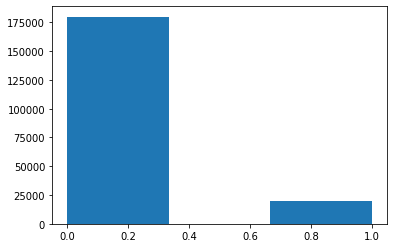

In [92]:
plt.hist(train['target'], bins=3)
plt.show()

In [107]:
cls = train['target'].value_counts()
cls

0    179902
1     20098
Name: target, dtype: int64

In [109]:
cls[1] / train.shape[0]

0.10049

**Вывод**
> **Присуствует большой дисбаланс классов - только 10% данных имеют класс "1"**

### 3. Построить распределение признаков в зависимости от значения целевой переменной и распределение признаков для обучающей и тестовой выборки

Если машина не позволяет построить распределение для всех признаков, то выполнить задание для признаков var_0, var_1, var_2, var_5, var_9, var_10, var_13, var_20, var_26, var_40, var_55, var_80, var_106, var_109, var_139, var_175, var_184, var_196, сделать выводы;

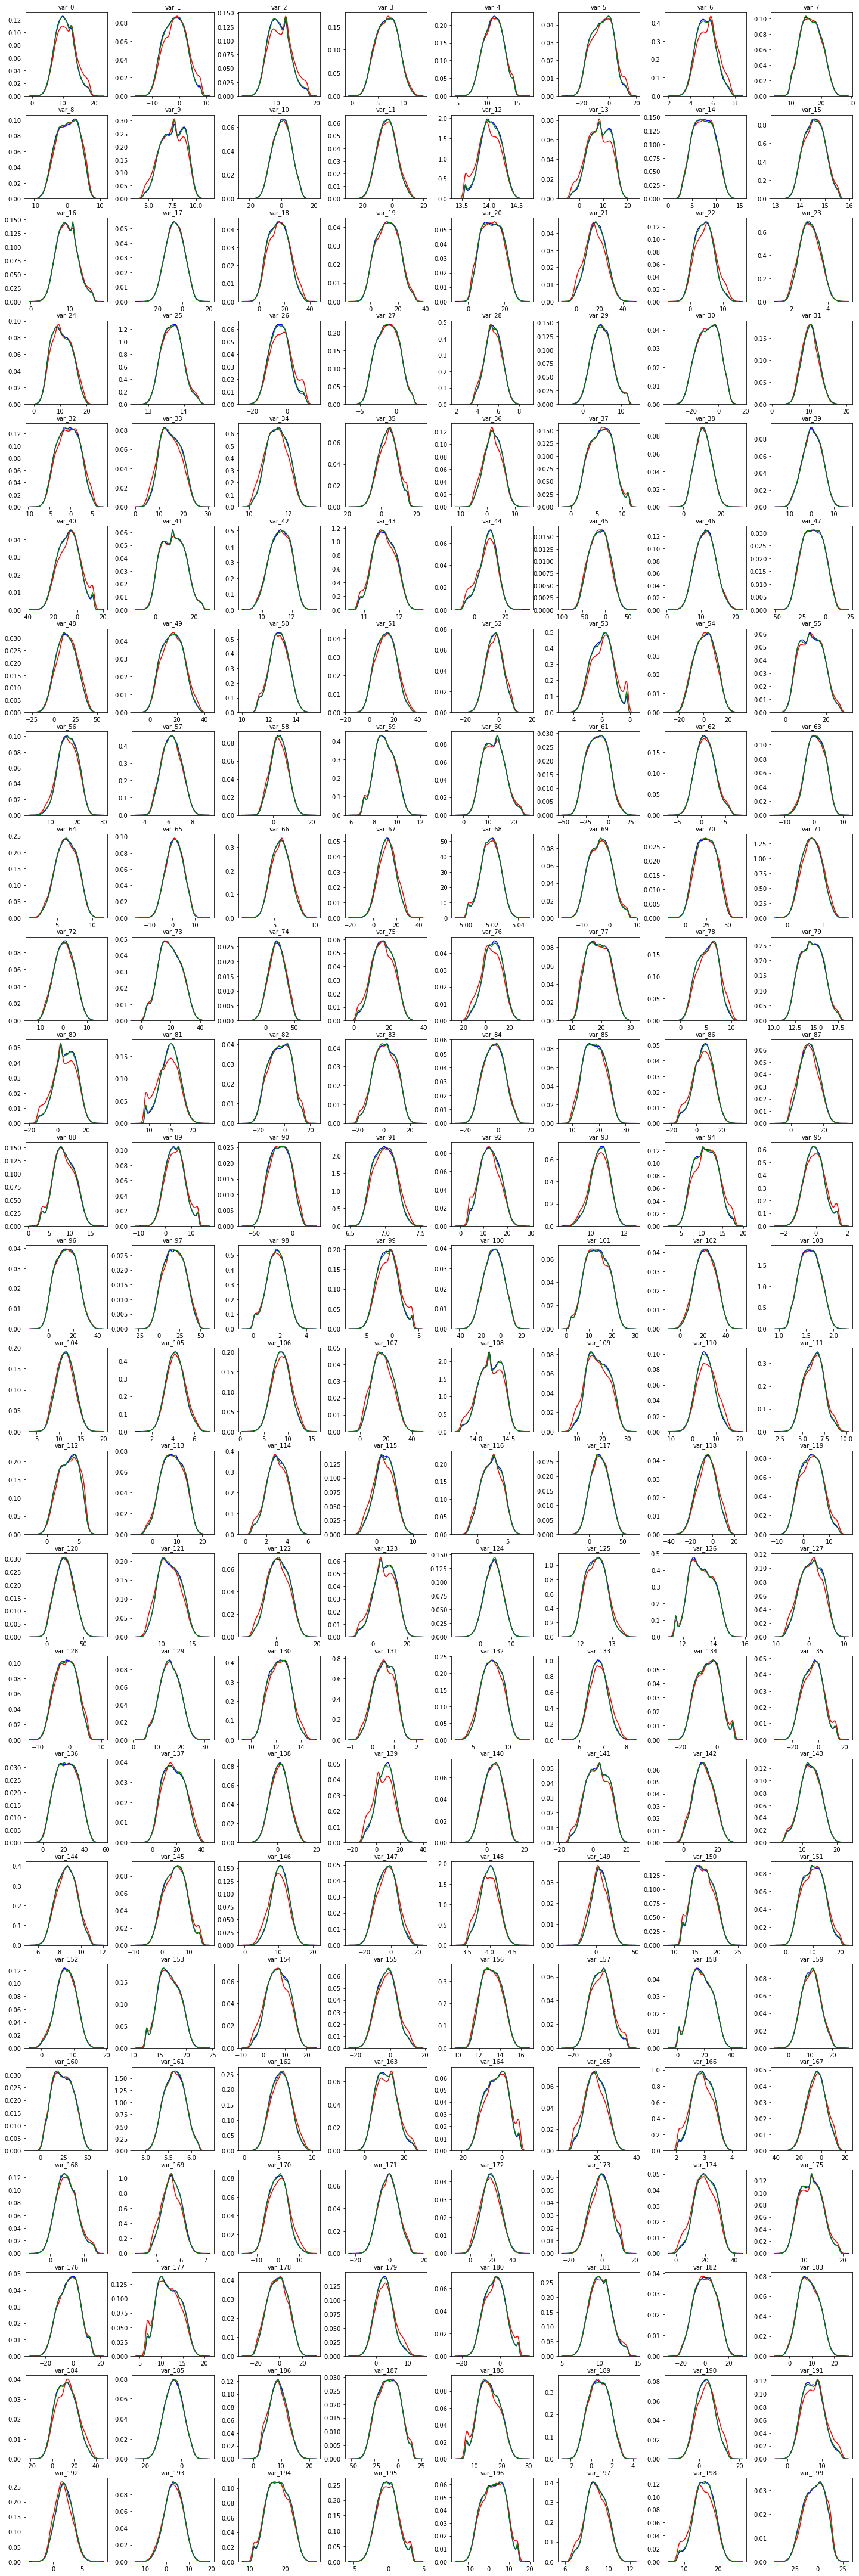

In [74]:
fig, axes = plt.subplots(25, 8, figsize=(20, 60))
fig.tight_layout()

for num, feature in enumerate(continuous_feature):
    ax = axes[num//8, num%8]
    sns.kdeplot(train[train['target']==1][feature], ax=ax, color="red", label="train")
    sns.kdeplot(train[train['target']==0][feature], ax=ax, color="blue", label="train")
    sns.kdeplot(test[feature], ax=ax, color="green", label="test")
    ax.set_title(feature, fontsize=10)
    ax.get_legend().remove()

**Выводы**
> **1. большинство признаков имеет нормальное или близкое к нормальному распределение**

> **2. распределение признаков для обучающей и тестовой выборки совпадает - что значит что оба датасета распределены одинаково**

> **3. также видно что распределения признаков для разных классов (в зависимости от целевой переменной) практически совпадает**

### 4. Построить распределение основных статистик признаков 

Среднее, стандартное отклонение в разрезе целевой переменной и распределение основных статистик обучающей и тестовой выборки, сделать выводы;

In [131]:
a = train[train['target']==1][continuous_feature].describe()
b = train[train['target']!=1][continuous_feature].describe()

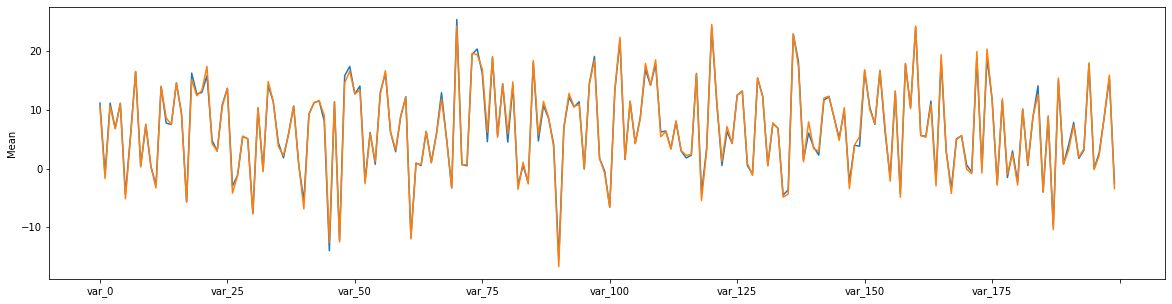

In [150]:
fig = plt.figure(figsize=(20, 5))
a.T['mean'].plot()
b.T['mean'].plot()
plt.ylabel('Mean')
plt.show()

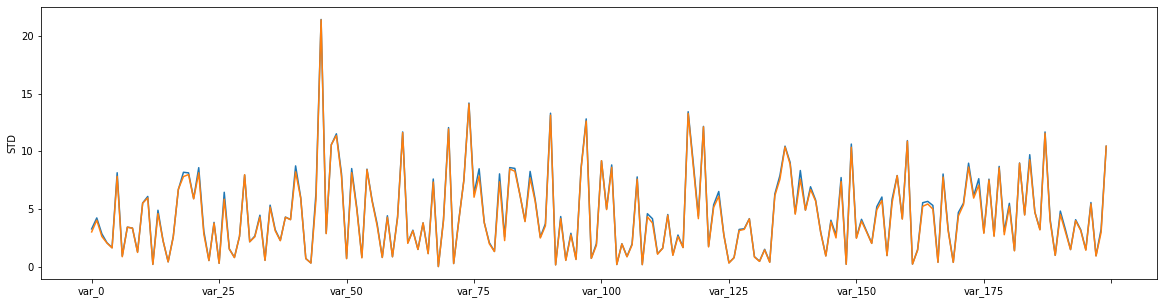

In [140]:
fig = plt.figure(figsize=(20, 5))
a.T['std'].plot()
b.T['std'].plot()
plt.ylabel('STD')
plt.show()

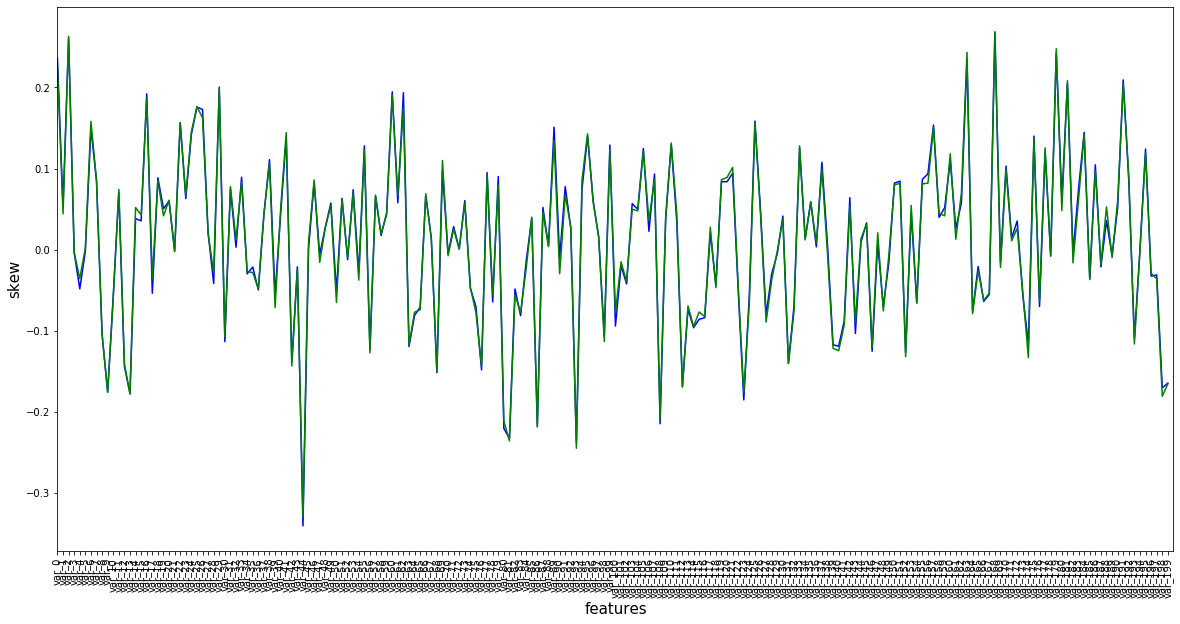

In [141]:
fig = plt.figure(figsize=(20, 10))
train_stats, test_stats = train[continuous_feature].skew(), test[continuous_feature].skew()
plt.plot(train_stats, color="blue", label="train")
plt.plot(test_stats, color="green", label="test")
plt.xticks(range(train_stats.shape[0]), train_stats.index, rotation=90)
plt.xlabel("features", size=15)
plt.xlim(0, len(train_stats))
plt.ylabel("skew", size=15)
plt.show()

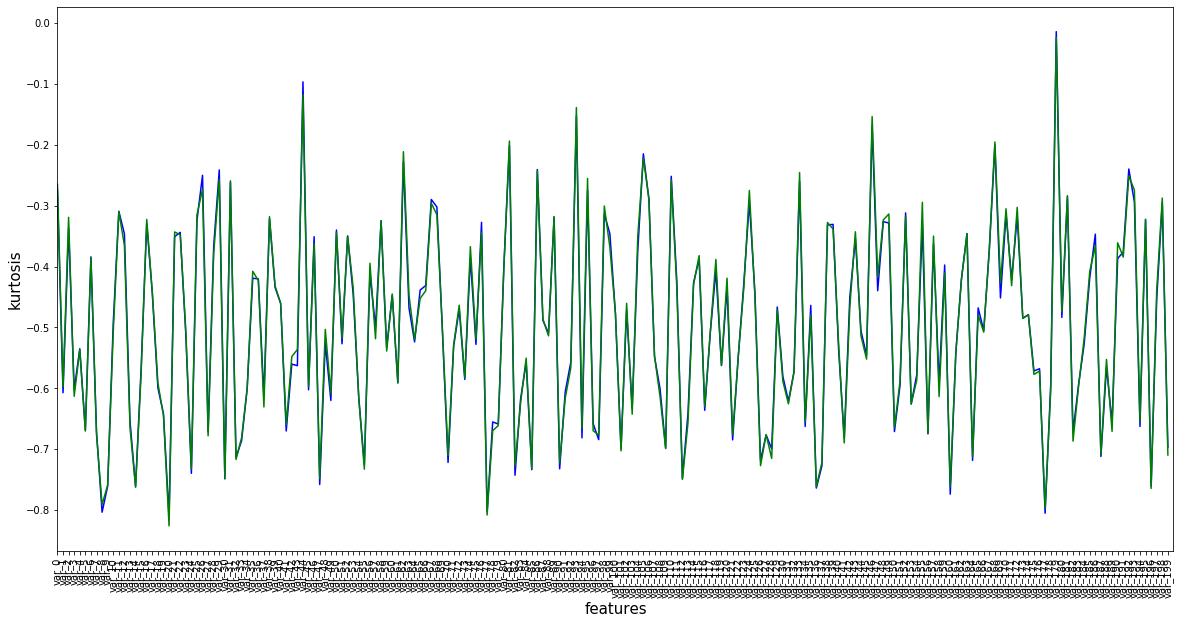

In [142]:
fig = plt.figure(figsize=(20, 10))
train_stats, test_stats = train[continuous_feature].kurtosis(), test[continuous_feature].kurtosis()
plt.plot(train_stats, color="blue", label="train")
plt.plot(test_stats, color="green", label="test")
plt.xticks(range(train_stats.shape[0]), train_stats.index, rotation=90)
plt.xlabel("features", size=15)
plt.ylabel("kurtosis", size=15)
plt.xlim(0, len(train_stats))
plt.show()

**Вывод**
> **Тестовые и обучающие данные имеют одинаковые статистики кроме того нет никаких перекосов данных (skew) и данные достаточно хорошо сосредоточены вокруг центра (kurtosis)**

### 5. Построить распределение коэффициентов корреляции между признаками. 

Есть ли зависимость между признаками (будем считать, что связь между признаками отсутствует, если коэффициент корреляции < 0.2)?

In [151]:
crr = train[continuous_feature].corr()

In [166]:
crr[(crr>=0.2) & (crr<1.0)].sum().sum()

0.0

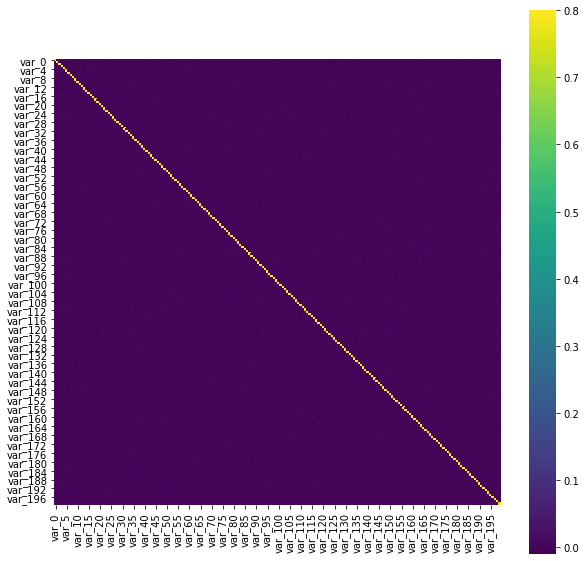

In [167]:
plt.figure(figsize = (10,10))
sns.heatmap(crr, square=True, vmax=0.8, cmap="viridis")

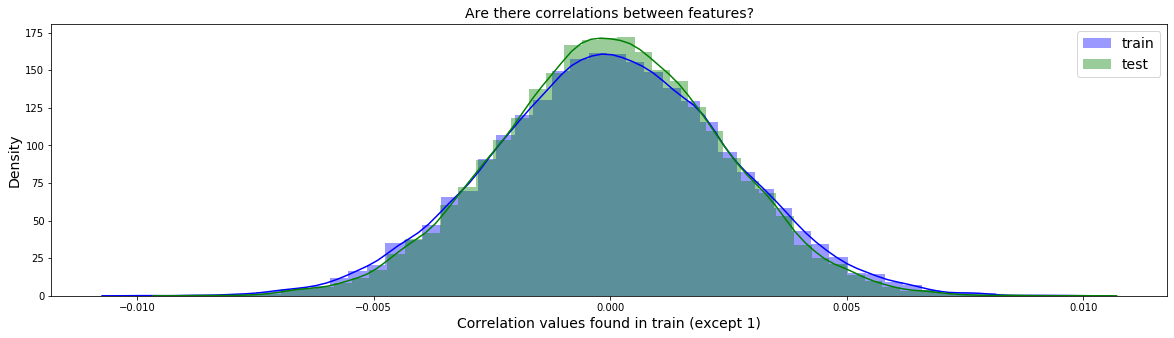

In [170]:
train_correlations = crr.copy()
train_correlations = train_correlations.values.flatten()
train_correlations = train_correlations[train_correlations != 1]

test_correlations = test[continuous_feature].corr()
test_correlations = test_correlations.values.flatten()
test_correlations = test_correlations[test_correlations != 1]

plt.figure(figsize=(20,5))
sns.distplot(train_correlations, color="Blue", label="train")
sns.distplot(test_correlations, color="Green", label="test")

plt.xlabel("Correlation values found in train (except 1)", size=14)
plt.title("Are there correlations between features?", size=14)
plt.legend(loc="best", fontsize=14)
plt.ylabel("Density", size=14)
plt.show()

**Вывод**
> **Нет признаков которые между собой имеют корреляцию больше чем 0.2 а судя по графику корреляции между признаками вообще нет**

### 6. Выявить 10 признаков, которые обладают наибольшей нелинейной связью с целевой переменной.

In [173]:
parameters = {"max_depth": 6, "n_estimators": 25, "random_state": 27, "n_jobs": 2}

forest = RandomForestClassifier(**parameters)
forest.fit(train[continuous_feature], train['target'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=2,
                       oob_score=False, random_state=27, verbose=0,
                       warm_start=False)

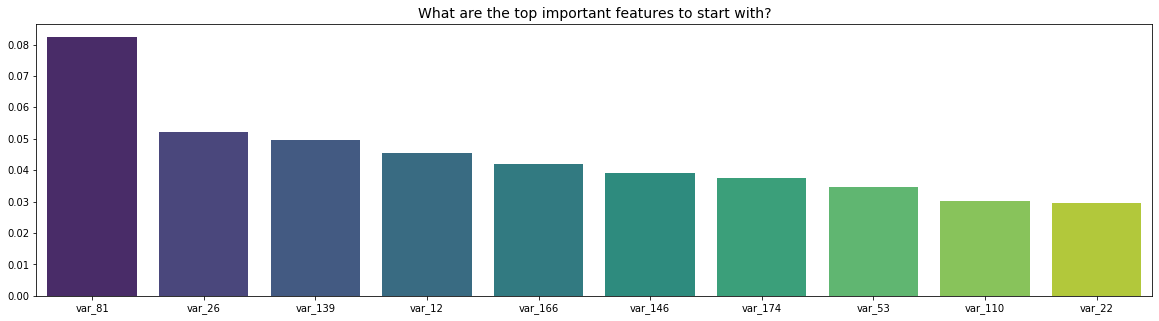

In [174]:
n_top = 10
importances = forest.feature_importances_
idx = np.argsort(importances)[::-1][0:n_top]

plt.figure(figsize=(20, 5))
sns.barplot(x=continuous_feature[idx], y=importances[idx], palette="viridis")
plt.title("What are the top important features to start with?", size=14)
plt.show()

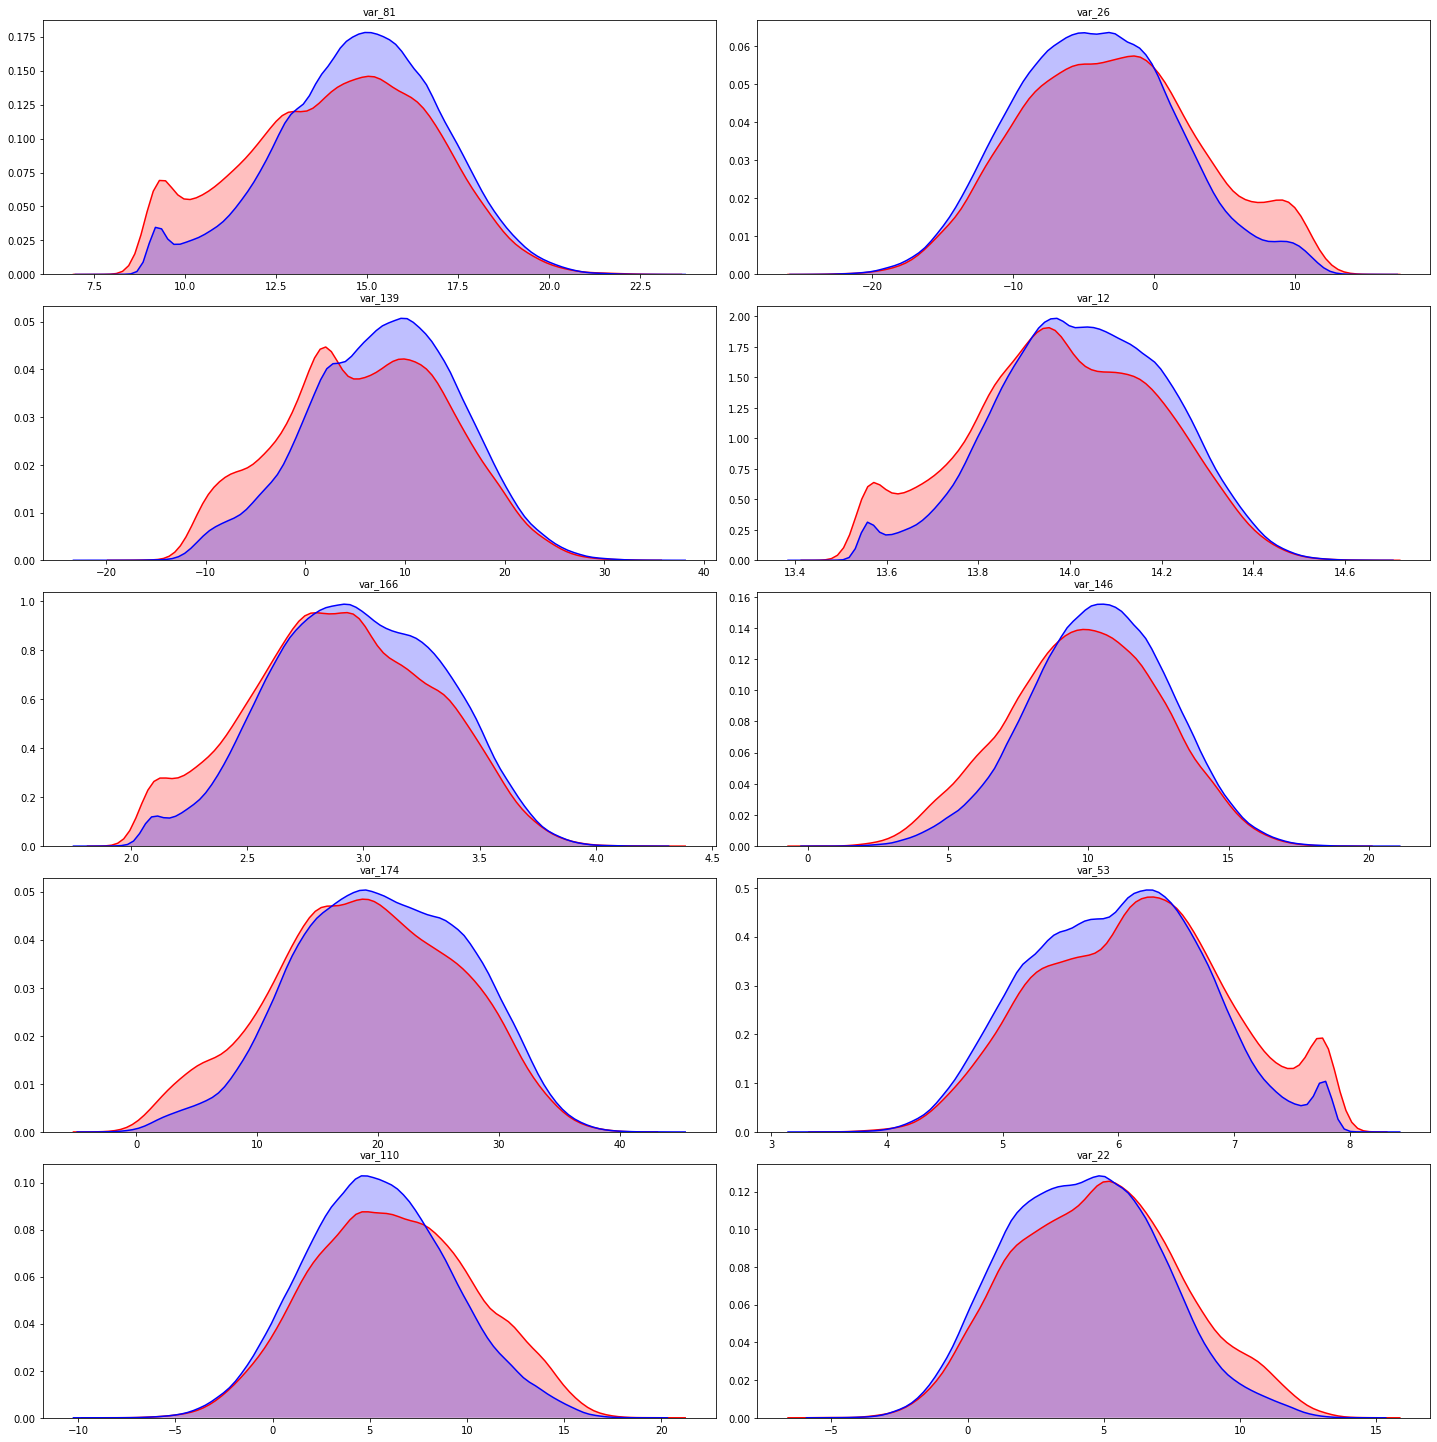

In [210]:
features = ['target']+list(continuous_feature[idx])

fig, axes = plt.subplots(5, 2, figsize=(20, 20))
fig.tight_layout()

for num, feature in enumerate(continuous_feature[idx]):
    ax = axes[num//2, num%2]
    sns.kdeplot(train[train['target']==1][feature], shade=True, ax=ax, color="red", label="train")
    sns.kdeplot(train[train['target']==0][feature], shade=True, ax=ax, color="blue", label="train")
    ax.set_title(feature, fontsize=10)
    ax.get_legend().remove()

**Вывод**
> **Следующие 10 признаков имеют самую высокую нелинейную связь:**

> **var_81, var_26, var_139, var_12, var_166, var_146, var_174, var_53, var_110, var_22**

### 7. Провести анализ идентичности распределения признаков на обучающей и тестовой выборках, сделать выводы.


> **Несовсем понял что тут делать вроде я уже это сделал в предидущих пунктах**